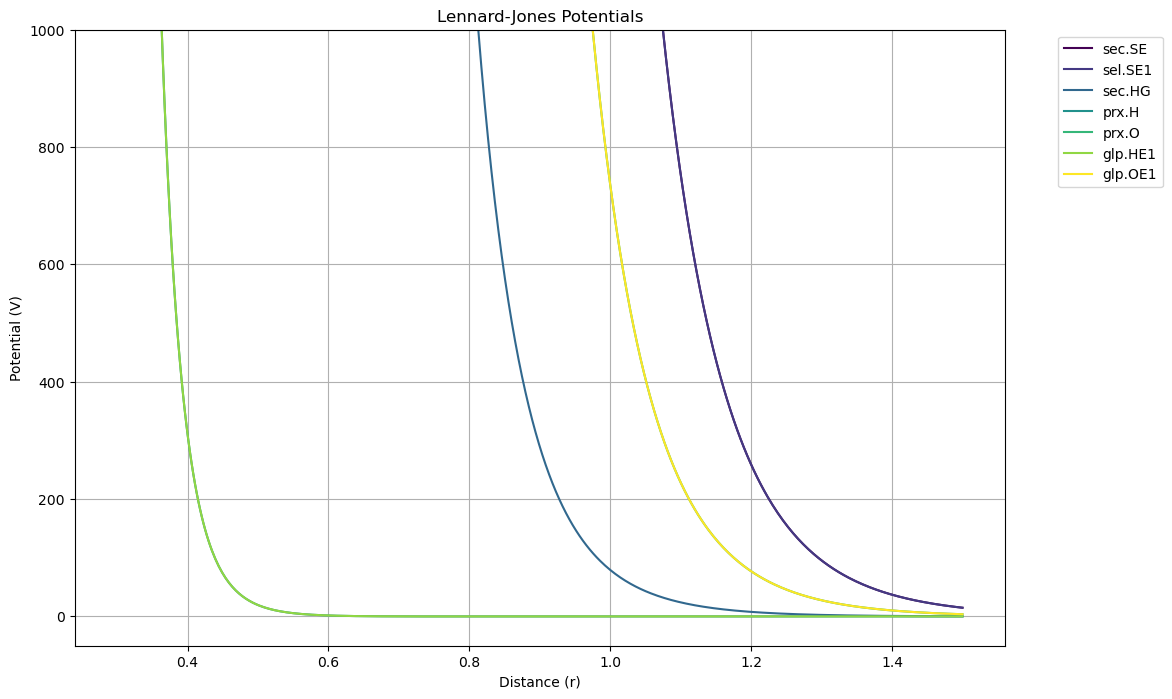

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Lennard-Jones parameters for each atom type
atom_data = {
    'sec.SE': {'A': 2447.7925, 'B': 46.7907},
    'sel.SE1': {'A': 2447.7925, 'B': 46.7907},
    'sec.HG': {'A': 84.5728, 'B': 5.4127},
    'prx.H': {'A': 0.0054, 'B': 0.0433},
    'prx.O': {'A': 760.645, 'B': 25.0448},
    'glp.HE1': {'A': 0.0054, 'B': 0.0433},
    'glp.OE1': {'A': 760.645, 'B': 25.0448},
}

# Lennard-Jones potential function
def lj_potential(r, A, B):
    return (A / r**12) - (B / r**6)

# Generate a range of distances r
r = np.linspace(0.3, 1.5, 500)

# Color cycle for the plot lines
colors = plt.cm.viridis(np.linspace(0, 1, len(atom_data)))

# Plot Lennard-Jones potentials
plt.figure(figsize=(12, 8))

for (atom, params), color in zip(atom_data.items(), colors):
    A = params['A']
    B = params['B']
    if A != 0 and B != 0:
        V = lj_potential(r, A, B)
        plt.plot(r, V, label=atom, color=color)

plt.xlabel('Distance (r)')
plt.ylabel('Potential (V)')
plt.title('Lennard-Jones Potentials')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(-50, 1000)
plt.grid(True)
plt.show()

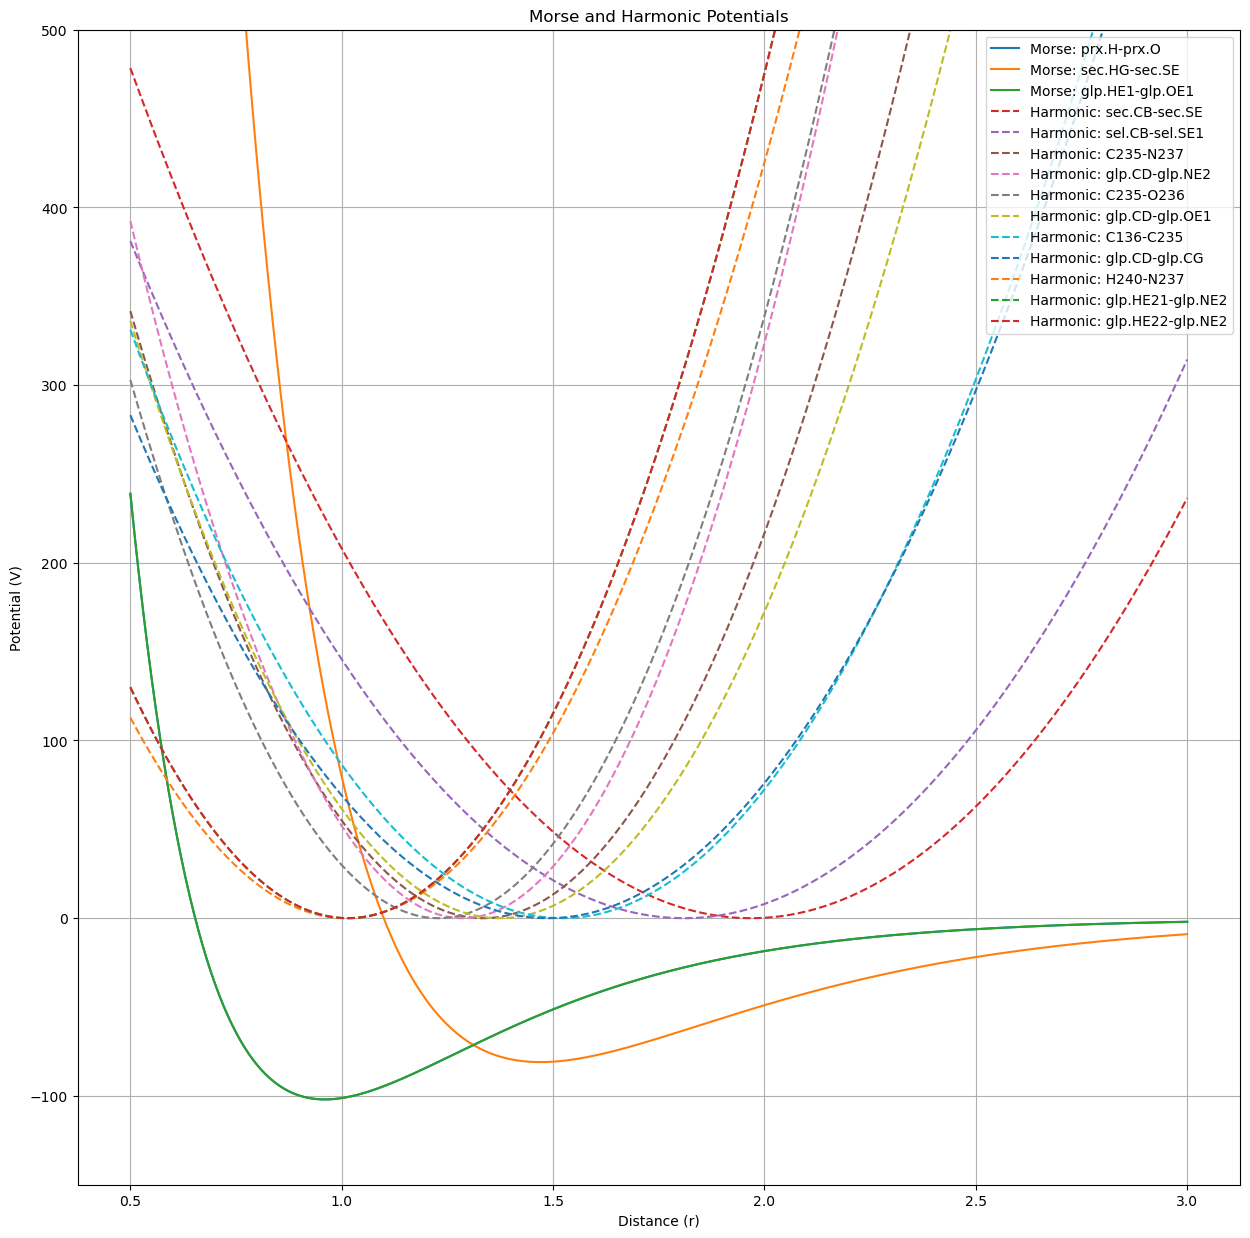

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Morse potential parameters for each pair of atoms
morse_data = {
    'prx.H-prx.O': {'D': 102, 'alpha': 2.26, 'r0': 0.96},
    'sec.HG-sec.SE': {'D': 81, 'alpha': 1.87, 'r0': 1.47},
    'glp.HE1-glp.OE1': {'D': 102, 'alpha': 2.26, 'r0': 0.96}
}

# Harmonic potential parameters for each pair of atoms
harmonic_data = {
    'sec.CB-sec.SE': {'k': 444.0, 'r0': 1.968},
    'sel.CB-sel.SE1': {'k': 444.0, 'r0': 1.81},
    'C235-N237': {'k': 980.0, 'r0': 1.335},
    'glp.CD-glp.NE2': {'k': 1270.0, 'r0': 1.286},
    'C235-O236': {'k': 1140.0, 'r0': 1.229},
    'glp.CD-glp.OE1': {'k': 880.0, 'r0': 1.374},
    'C136-C235': {'k': 634.0, 'r0': 1.522},
    'glp.CD-glp.CG': {'k': 580.0, 'r0': 1.488},
    'H240-N237': {'k': 868.0, 'r0': 1.01},
    'glp.HE21-glp.NE2': {'k': 980.0, 'r0': 1.015},
    'glp.HE22-glp.NE2': {'k': 980.0, 'r0': 1.015}
}

# Morse potential function
def morse_potential(r, D, alpha, r0):
    return D * (1 - np.exp(-alpha * (r - r0)))**2 - D

# Harmonic potential function
def harmonic_potential(r, k, r0):
    return 0.5 * k * (r - r0)**2

# Generate a range of distances r
r = np.linspace(0.5, 3.0, 500)

# Plot Morse and harmonic potentials
plt.figure(figsize=(15, 15))

# Plot Morse potentials
for pair, params in morse_data.items():
    D = params['D']
    alpha = params['alpha']
    r0 = params['r0']
    V = morse_potential(r, D, alpha, r0)
    plt.plot(r, V, label=f'Morse: {pair}')

# Plot harmonic potentials
for pair, params in harmonic_data.items():
    k = params['k']
    r0 = params['r0']
    V = harmonic_potential(r, k, r0)
    plt.plot(r, V, linestyle='--', label=f'Harmonic: {pair}')

plt.xlabel('Distance (r)')
plt.ylabel('Potential (V)')
plt.title('Morse and Harmonic Potentials')
plt.legend()
plt.ylim(-150, 500)
plt.grid(True)
plt.show()